# Data Exploration for: FD004
Group 2

Before running activate the venv

In [109]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm

## 0. Load Data

In [77]:
train_data = pd.read_csv('./data/train_FD004.txt', delim_whitespace=True, header=None)
test_data = pd.read_csv('./data/test_FD004.txt', delim_whitespace=True, header=None)

In [78]:
# Motornummer, Zeitschritt
index_columns_names =  ["UnitNumber","Cycle"]
# 3 betriebsbereite Sensoreinstellungen
operational_settings_columns_names = ["Operation Setting "+str(i) for i in range(1,4)]
# 21 Sensormessungen
sensor_measure_columns_names =["Sensor Measure"+str(i) for i in range(1,22)]

input_file_column_names = index_columns_names + operational_settings_columns_names + sensor_measure_columns_names

In [79]:
train_data.columns = input_file_column_names
test_data.columns = input_file_column_names

## 1. Data Exploration

### 1.1 See basic data exploration

In [80]:
train_data.head()

UnitNumber  Cycle  Operation Setting 1  Operation Setting 2  \
0           1      1              42.0049               0.8400   
1           1      2              20.0020               0.7002   
2           1      3              42.0038               0.8409   
3           1      4              42.0000               0.8400   
4           1      5              25.0063               0.6207   

   Operation Setting 3  Sensor Measure1  Sensor Measure2  Sensor Measure3  \
0                100.0           445.00           549.68          1343.43   
1                100.0           491.19           606.07          1477.61   
2                100.0           445.00           548.95          1343.12   
3                100.0           445.00           548.70          1341.24   
4                 60.0           462.54           536.10          1255.23   

   Sensor Measure4  Sensor Measure5  ...  Sensor Measure12  Sensor Measure13  \
0          1112.93             3.91  ...            129.78           2387.99   
1          1237.50             9.35  ...            312.59           2387.73   
2          1117.05             3.91  ...            129.62           2387.97   
3          1118.03             3.91  ...            129.80           2388.02   
4          1033.59             7.05  ...            164.11           2028.08   

   Sensor Measure14  Sensor Measure15  Sensor Measure16  Sensor Measure17  \
0           8074.83            9.3335              0.02               330   
1           8046.13            9.1913              0.02               361   
2           8066.62            9.4007              0.02               329   
3           8076.05            9.3369              0.02               328   
4           7865.80           10.8366              0.02               305   

   Sensor Measure18  Sensor Measure19  Sensor Measure20  Sensor Measure21  
0              2212            100.00             10.62            6.3670  
1              2324            100.00             24.37           14.6552  
2              2212            100.00             10.48            6.4213  
3              2212            100.00             10.54            6.4176  
4              1915             84.93             14.03            8.6754  

[5 rows x 26 columns]

In [81]:
test_data.head()

UnitNumber  Cycle  Operation Setting 1  Operation Setting 2  \
0           1      1              20.0072               0.7000   
1           1      2              24.9984               0.6200   
2           1      3              42.0000               0.8420   
3           1      4              42.0035               0.8402   
4           1      5              35.0079               0.8400   

   Operation Setting 3  Sensor Measure1  Sensor Measure2  Sensor Measure3  \
0                100.0           491.19           606.67          1481.04   
1                 60.0           462.54           536.22          1256.17   
2                100.0           445.00           549.23          1340.13   
3                100.0           445.00           549.19          1339.70   
4                100.0           449.44           555.10          1353.04   

   Sensor Measure4  Sensor Measure5  ...  Sensor Measure12  Sensor Measure13  \
0          1227.81             9.35  ...            313.03           2387.78   
1          1031.48             7.05  ...            163.61           2028.09   
2          1105.88             3.91  ...            129.98           2387.95   
3          1107.26             3.91  ...            129.48           2387.90   
4          1117.80             5.48  ...            181.82           2387.87   

   Sensor Measure14  Sensor Measure15  Sensor Measure16  Sensor Measure17  \
0           8048.98            9.2229              0.02               362   
1           7863.46           10.8632              0.02               306   
2           8071.13            9.3960              0.02               328   
3           8078.89            9.3594              0.02               328   
4           8057.83            9.3030              0.02               333   

   Sensor Measure18  Sensor Measure19  Sensor Measure20  Sensor Measure21  
0              2324            100.00             24.31           14.7007  
1              1915             84.93             14.36            8.5748  
2              2212            100.00             10.39            6.4365  
3              2212            100.00             10.56            6.2367  
4              2223            100.00             14.85            8.9326  

[5 rows x 26 columns]

In [82]:
unit_train = train_data["UnitNumber"].unique()
print(f"We have {len(unit_train)} motors.")

unit_test = test_data["UnitNumber"].unique()
print(f"We have {len(unit_test)} motors.")

We have 249 motors.
We have 248 motors.


This mean that we have 249 complete time series.

In [83]:
cycles_train = []
for motor_id in unit_train:
    temp = train_data[train_data["UnitNumber"]==motor_id]
    print("Turbofan motor withID {} have in total {} cycles".format(motor_id, temp.shape[0]))
    cycles_train.append(temp.shape[0])

Turbofan motor withID 1 have in total 321 cycles
Turbofan motor withID 2 have in total 299 cycles
Turbofan motor withID 3 have in total 307 cycles
Turbofan motor withID 4 have in total 274 cycles
Turbofan motor withID 5 have in total 193 cycles
Turbofan motor withID 6 have in total 331 cycles
Turbofan motor withID 7 have in total 221 cycles
Turbofan motor withID 8 have in total 230 cycles
Turbofan motor withID 9 have in total 334 cycles
Turbofan motor withID 10 have in total 354 cycles
Turbofan motor withID 11 have in total 301 cycles
Turbofan motor withID 12 have in total 272 cycles
Turbofan motor withID 13 have in total 256 cycles
Turbofan motor withID 14 have in total 253 cycles
Turbofan motor withID 15 have in total 224 cycles
Turbofan motor withID 16 have in total 184 cycles
Turbofan motor withID 17 have in total 151 cycles
Turbofan motor withID 18 have in total 343 cycles
Turbofan motor withID 19 have in total 210 cycles
Turbofan motor withID 20 have in total 245 cycles
Turbofan 

In [84]:
cycles_test = []
for motor_id in unit_test:
    temp = test_data[test_data["UnitNumber"]==motor_id]
    print("Turbofan motor withID {} have in total {} cycles".format(motor_id, temp.shape[0]))
    cycles_test.append(temp.shape[0])

Turbofan motor withID 1 have in total 230 cycles
Turbofan motor withID 2 have in total 153 cycles
Turbofan motor withID 3 have in total 141 cycles
Turbofan motor withID 4 have in total 208 cycles
Turbofan motor withID 5 have in total 51 cycles
Turbofan motor withID 6 have in total 146 cycles
Turbofan motor withID 7 have in total 54 cycles
Turbofan motor withID 8 have in total 248 cycles
Turbofan motor withID 9 have in total 284 cycles
Turbofan motor withID 10 have in total 23 cycles
Turbofan motor withID 11 have in total 82 cycles
Turbofan motor withID 12 have in total 270 cycles
Turbofan motor withID 13 have in total 227 cycles
Turbofan motor withID 14 have in total 102 cycles
Turbofan motor withID 15 have in total 168 cycles
Turbofan motor withID 16 have in total 240 cycles
Turbofan motor withID 17 have in total 334 cycles
Turbofan motor withID 18 have in total 247 cycles
Turbofan motor withID 19 have in total 24 cycles
Turbofan motor withID 20 have in total 115 cycles
Turbofan motor

Each motor has diferent amount of cycles (diferent time serie length).

In [85]:
# Display basic statistics of the dataset
print("\nBasic statistics of the train dataset:")
print(train_data.describe())


Basic statistics of the train dataset:
         UnitNumber         Cycle  Operation Setting 1  Operation Setting 2  \
count  61249.000000  61249.000000         61249.000000         61249.000000   
mean     124.325181    134.311417            23.999823             0.571347   
std       71.995350     89.783389            14.780722             0.310703   
min        1.000000      1.000000             0.000000             0.000000   
25%       60.000000     62.000000            10.004600             0.250700   
50%      126.000000    123.000000            25.001400             0.700000   
75%      185.000000    191.000000            41.998100             0.840000   
max      249.000000    543.000000            42.008000             0.842000   

       Operation Setting 3  Sensor Measure1  Sensor Measure2  Sensor Measure3  \
count         61249.000000     61249.000000     61249.000000     61249.000000   
mean             94.031576       472.882435       579.420056      1417.896600   
std  

In [86]:
print("\nBasic statistics of the test dataset:")
print(test_data.describe())


Basic statistics of the test dataset:
         UnitNumber         Cycle  Operation Setting 1  Operation Setting 2  \
count  41214.000000  41214.000000         41214.000000         41214.000000   
mean     120.006017    108.739094            24.115207             0.574725   
std       71.685208     83.717459            14.714512             0.308868   
min        1.000000      1.000000             0.000000             0.000000   
25%       57.000000     43.000000            10.004700             0.250700   
50%      118.000000     91.000000            25.001500             0.700000   
75%      181.000000    155.000000            41.998100             0.840000   
max      248.000000    486.000000            42.008000             0.842000   

       Operation Setting 3  Sensor Measure1  Sensor Measure2  Sensor Measure3  \
count         41214.000000     41214.000000     41214.000000     41214.000000   
mean             94.072888       472.711616       579.069264      1414.951596   
std   

In [87]:
# Check for missing values
print("\nMissing values in the train dataset:")
print(train_data.isnull().sum())

print("\nMissing values in the test dataset:")
print(test_data.isnull().sum())


Missing values in the train dataset:
UnitNumber             0
Cycle                  0
Operation Setting 1    0
Operation Setting 2    0
Operation Setting 3    0
Sensor Measure1        0
Sensor Measure2        0
Sensor Measure3        0
Sensor Measure4        0
Sensor Measure5        0
Sensor Measure6        0
Sensor Measure7        0
Sensor Measure8        0
Sensor Measure9        0
Sensor Measure10       0
Sensor Measure11       0
Sensor Measure12       0
Sensor Measure13       0
Sensor Measure14       0
Sensor Measure15       0
Sensor Measure16       0
Sensor Measure17       0
Sensor Measure18       0
Sensor Measure19       0
Sensor Measure20       0
Sensor Measure21       0
dtype: int64

Missing values in the test dataset:
UnitNumber             0
Cycle                  0
Operation Setting 1    0
Operation Setting 2    0
Operation Setting 3    0
Sensor Measure1        0
Sensor Measure2        0
Sensor Measure3        0
Sensor Measure4        0
Sensor Measure5        0
Sensor Measu

No nans, that is good.

In [88]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61249 entries, 0 to 61248
Data columns (total 26 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   UnitNumber           61249 non-null  int64  
 1   Cycle                61249 non-null  int64  
 2   Operation Setting 1  61249 non-null  float64
 3   Operation Setting 2  61249 non-null  float64
 4   Operation Setting 3  61249 non-null  float64
 5   Sensor Measure1      61249 non-null  float64
 6   Sensor Measure2      61249 non-null  float64
 7   Sensor Measure3      61249 non-null  float64
 8   Sensor Measure4      61249 non-null  float64
 9   Sensor Measure5      61249 non-null  float64
 10  Sensor Measure6      61249 non-null  float64
 11  Sensor Measure7      61249 non-null  float64
 12  Sensor Measure8      61249 non-null  float64
 13  Sensor Measure9      61249 non-null  float64
 14  Sensor Measure10     61249 non-null  float64
 15  Sensor Measure11     61249 non-null 

In [89]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41214 entries, 0 to 41213
Data columns (total 26 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   UnitNumber           41214 non-null  int64  
 1   Cycle                41214 non-null  int64  
 2   Operation Setting 1  41214 non-null  float64
 3   Operation Setting 2  41214 non-null  float64
 4   Operation Setting 3  41214 non-null  float64
 5   Sensor Measure1      41214 non-null  float64
 6   Sensor Measure2      41214 non-null  float64
 7   Sensor Measure3      41214 non-null  float64
 8   Sensor Measure4      41214 non-null  float64
 9   Sensor Measure5      41214 non-null  float64
 10  Sensor Measure6      41214 non-null  float64
 11  Sensor Measure7      41214 non-null  float64
 12  Sensor Measure8      41214 non-null  float64
 13  Sensor Measure9      41214 non-null  float64
 14  Sensor Measure10     41214 non-null  float64
 15  Sensor Measure11     41214 non-null 

Everything is numeric, so we dont have to encode the categorical columns, because it doesnt exist.

### 1.2 Add RUL column to datasets

In [90]:
def add_remaining_useful_life(df):
    # Get the total number of cycles for each unit
    grouped_by_unit = df.groupby(by="UnitNumber")
    max_cycle = grouped_by_unit["Cycle"].max()
    result_frame = df.merge(max_cycle.to_frame(name='max_cycle'), left_on='UnitNumber', right_index=True)
    remaining_useful_life = result_frame["max_cycle"] - result_frame["Cycle"]
    result_frame["RUL"] = remaining_useful_life
    result_frame.drop("max_cycle", axis=1, inplace=True)
    return result_frame

train_data = add_remaining_useful_life(train_data) #Only for train data. Test data we dont have max_cycle

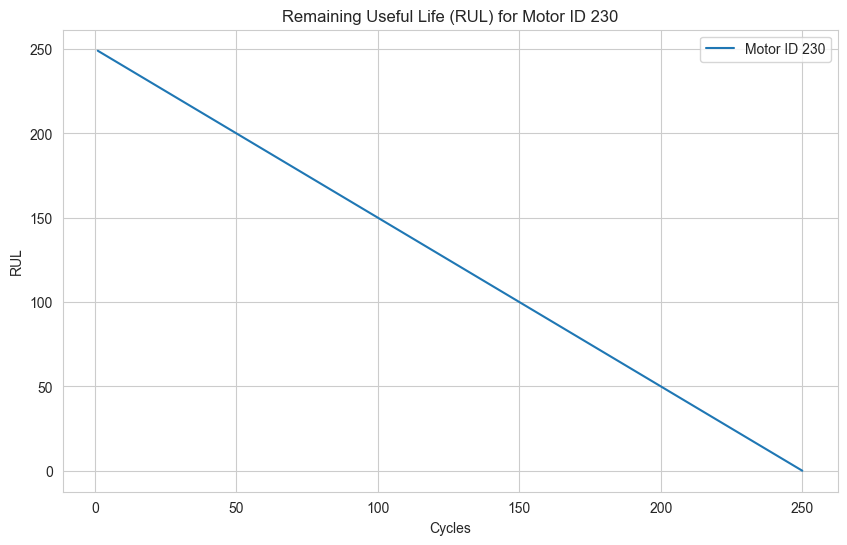

In [91]:
# Example motor ID
motor_id = 230
motor_data = train_data[train_data["UnitNumber"] == motor_id]

# Set the aesthetic style of the plots
sns.set_style("whitegrid")

# Plot the RUL with "cycles" on the x-axis using Seaborn
plt.figure(figsize=(10, 6))
sns.lineplot(data=motor_data, x="Cycle", y="RUL", label=f'Motor ID {motor_id}')
plt.title(f'Remaining Useful Life (RUL) for Motor ID {motor_id}')
plt.xlabel('Cycles')
plt.ylabel('RUL')
plt.legend()
plt.show()

### 1.3 See some feature distributions

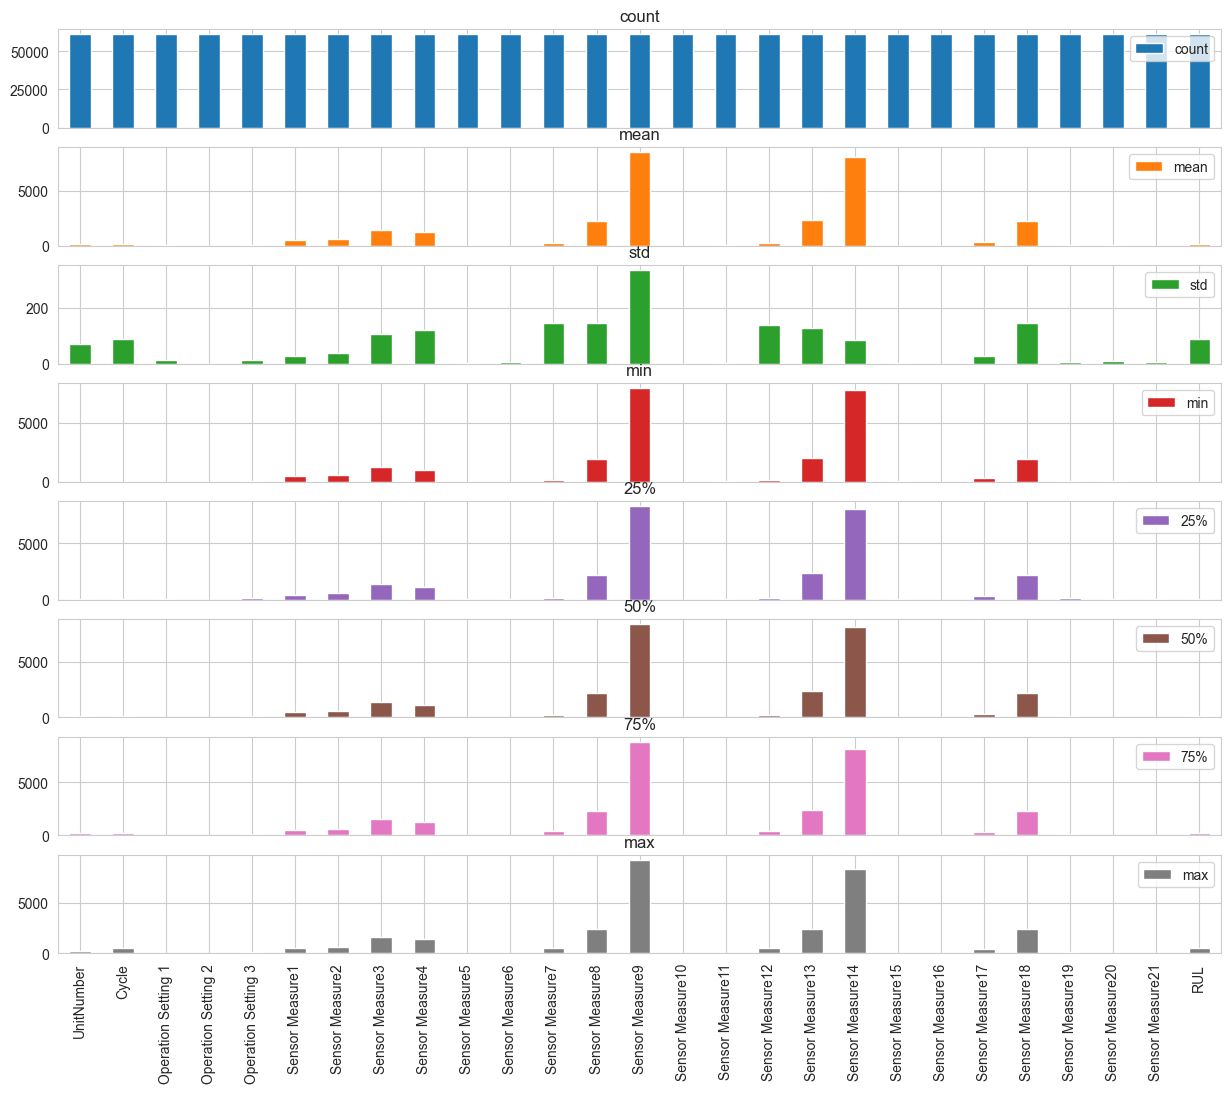

In [92]:
# plot an overview of whats going on in the columns
axes = train_data.describe().T.plot.bar(subplots=True, figsize=(15,12))

It seems that there are columns with constant values.

In [93]:
cols_const = [ col for col in train_data.columns if len(train_data[col].unique()) <= 1 ]
print('Columns with constant values: \n' + str(cols_const) + '\n')

Columns with constant values: 
[]



No there arent but if we search for only 2 unique values?

In [94]:
cols_const = [ col for col in train_data.columns if len(train_data[col].unique()) <= 2 ]
print('Columns with constant values: \n' + str(cols_const) + '\n')

cols_const = [ col for col in test_data.columns if len(test_data[col].unique()) <= 2 ]
print('Columns with constant values: \n' + str(cols_const) + '\n')

Columns with constant values: 
['Operation Setting 3', 'Sensor Measure16', 'Sensor Measure19']

Columns with constant values: 
['Operation Setting 3', 'Sensor Measure16', 'Sensor Measure19']



In train and test data they match.

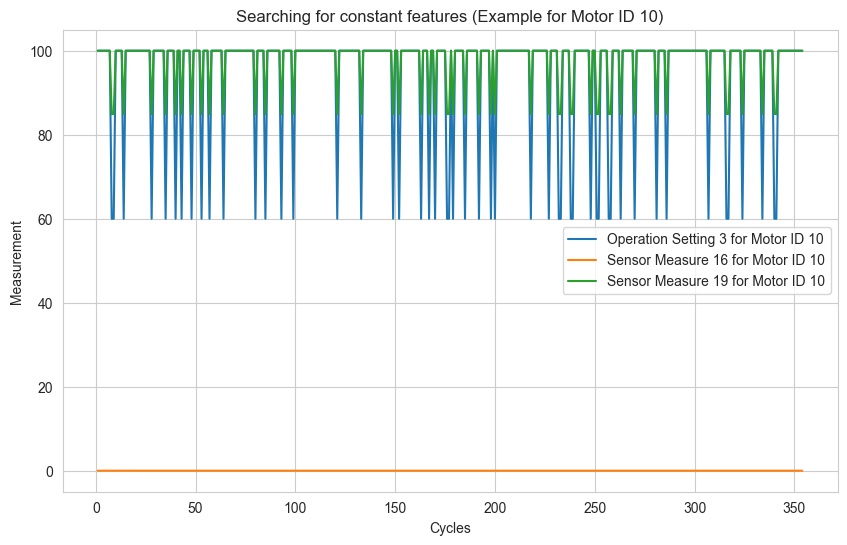

In [95]:
# Example motor ID
motor_id = 10
motor_data = train_data[train_data["UnitNumber"] == motor_id]

# Plot the RUL with "cycles" on the x-axis using Seaborn
plt.figure(figsize=(10, 6))
sns.lineplot(data=motor_data, x="Cycle", y="Operation Setting 3", label=f'Operation Setting 3 for Motor ID {motor_id}')
sns.lineplot(data=motor_data, x="Cycle", y="Sensor Measure16", label=f'Sensor Measure 16 for Motor ID {motor_id}')
sns.lineplot(data=motor_data, x="Cycle", y="Sensor Measure19", label=f'Sensor Measure 19 for Motor ID {motor_id}')
plt.title(f'Searching for constant features (Example for Motor ID {motor_id})')
plt.xlabel('Cycles')
plt.ylabel('Measurement')
plt.legend()
plt.show()

Ok, maybe could be useful eliminate this columns. We try with different motor id and th Sensor Measure 16 is always constan. Also the other two, Operation Setting 3 and Sensor Measure 19 have only two values and they are correlated.

### 1.4 Correlation

<AxesSubplot: >

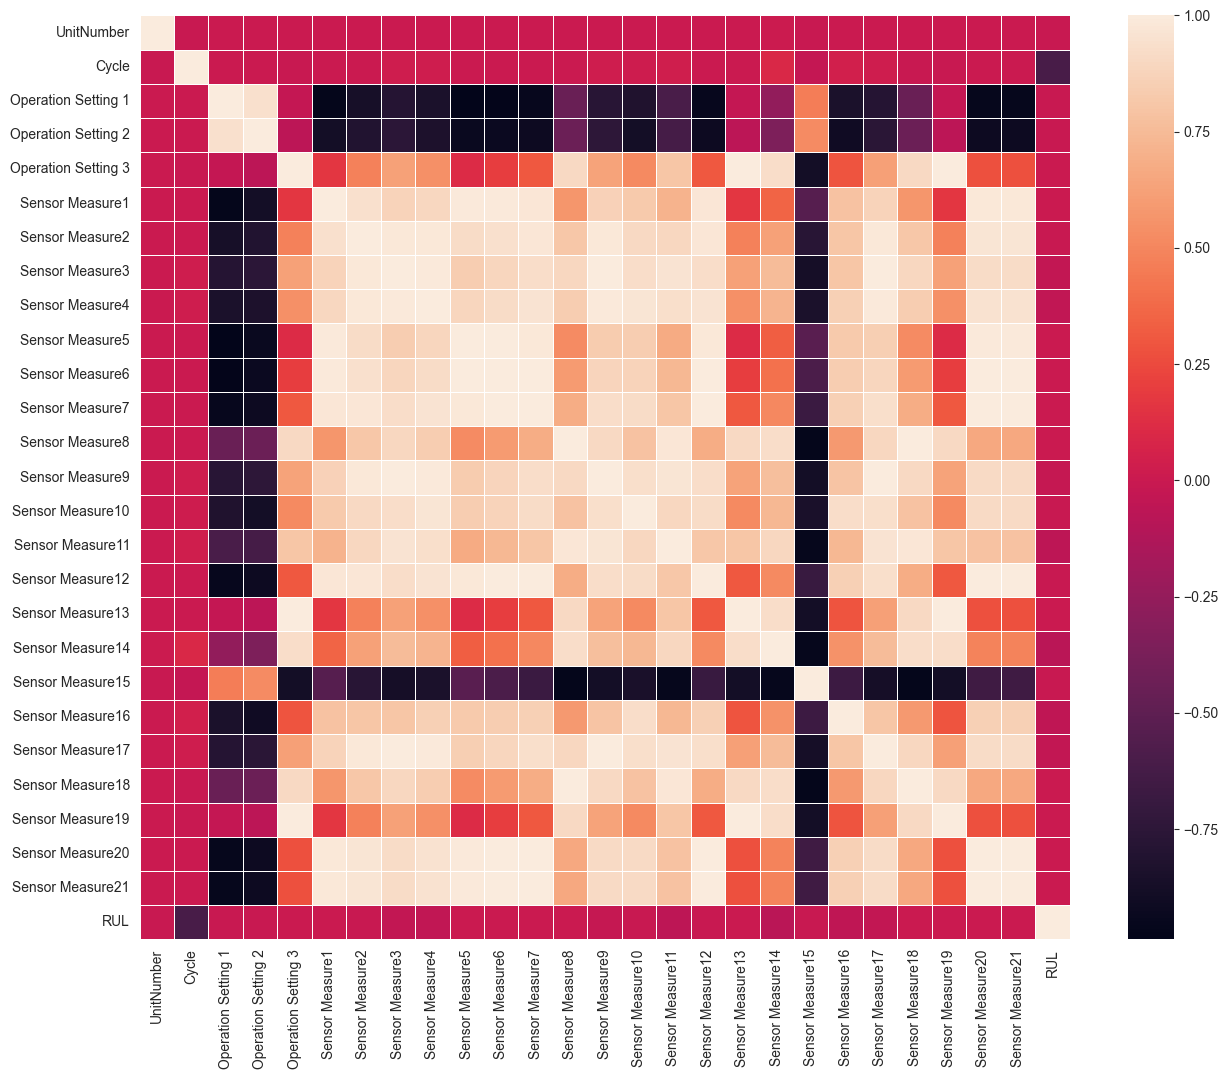

In [96]:
# Pearson correlation heatmap
analysis_data_corr = train_data.corr(method='pearson')
fig, ax = plt.subplots(figsize=(15,12))
sns.heatmap(analysis_data_corr, linewidths=.5)

In [97]:
# Print highly correlated values
analysis_data_corr2 = pd.DataFrame(np.tril(analysis_data_corr.values), columns=analysis_data_corr.columns, index = analysis_data_corr.index)

correlating = []
for col in analysis_data_corr2.columns:
    ser = analysis_data_corr2[col]
    idx = np.logical_or(-0.8 > ser,  ser > 0.8)
    for i, c in zip(ser[idx].index, ser[idx].values):
        if (i, col, c) not in correlating and i != col:
            correlating.append((col, i, c))

print('Highly correlating values:')
for c in correlating:
    print(c)

Highly correlating values:
('Operation Setting 1', 'Operation Setting 2', 0.9437957915253659)
('Operation Setting 1', 'Sensor Measure1', -0.9647537825551034)
('Operation Setting 1', 'Sensor Measure2', -0.8683901310670603)
('Operation Setting 1', 'Sensor Measure4', -0.8399879849209932)
('Operation Setting 1', 'Sensor Measure5', -0.98738240721035)
('Operation Setting 1', 'Sensor Measure6', -0.976518260435562)
('Operation Setting 1', 'Sensor Measure7', -0.9515816690180171)
('Operation Setting 1', 'Sensor Measure10', -0.823819118986815)
('Operation Setting 1', 'Sensor Measure12', -0.9511577073510264)
('Operation Setting 1', 'Sensor Measure16', -0.840823399514854)
('Operation Setting 1', 'Sensor Measure20', -0.9620426253630363)
('Operation Setting 1', 'Sensor Measure21', -0.9620518497410266)
('Operation Setting 2', 'Sensor Measure1', -0.886122667495125)
('Operation Setting 2', 'Sensor Measure2', -0.8116126104744334)
('Operation Setting 2', 'Sensor Measure4', -0.8370545992601652)
('Operation

Maybe we can eliminate one of the high correlated features, the information is redundant. And the constant values of the previous part, maybe be can ignore it.

In [112]:
# Select the correlations with the target variable 'RUL'
rul_corr = analysis_data_corr['RUL']

# Sort the correlations by absolute value
sorted_rul_corr = rul_corr.reindex(rul_corr.abs().sort_values(ascending=False).index)

# Print the sorted correlating values with RUL
print('Correlating values with RUL, sorted by absolute value:')
for feature, correlation in sorted_rul_corr.items():
    print((feature, correlation))

Correlating values with RUL, sorted by absolute value:
('RUL', 1.0)
('Cycle', -0.6106197186967642)
('Sensor Measure14', -0.07812615219035073)
('Sensor Measure11', -0.0566392400577737)
('Sensor Measure16', -0.053804336930271035)
('Sensor Measure4', -0.04588110859302568)
('Sensor Measure17', -0.032939303551029676)
('Sensor Measure3', -0.03292405654292328)
('Sensor Measure9', -0.02472715028406107)
('Sensor Measure10', -0.008924050245450826)
('Sensor Measure2', -0.004443240063718993)
('Sensor Measure15', -0.003957072898584357)
('UnitNumber', -0.003655914776624505)
('Sensor Measure20', 0.0028117009588077063)
('Sensor Measure21', 0.0027907932394577693)
('Sensor Measure18', 0.0027646377576236777)
('Operation Setting 1', -0.0023803262557565495)
('Operation Setting 3', 0.002303388225444186)
('Sensor Measure19', 0.002303388225443806)
('Operation Setting 2', -0.0022795344868175756)
('Sensor Measure8', 0.002086059038859893)
('Sensor Measure1', 0.0018894117842805657)
('Sensor Measure5', 0.001678657

The correlation is minimal.

### 1.5 Time and Distribution Plots

Of train and test
- Plot measurement of some motors
- plot sesonal and trend of some motors
- Measurements distributions of some motors

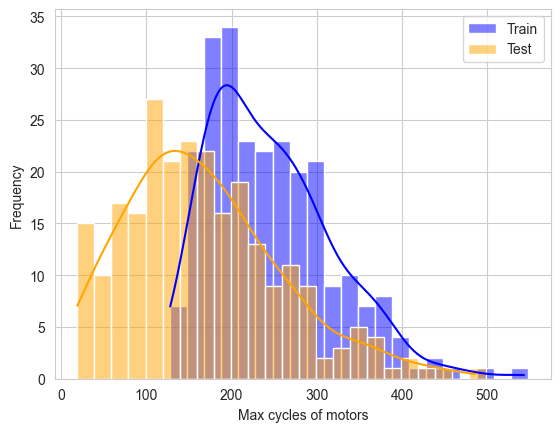

In [98]:
sns.histplot(data=cycles_train, binwidth=20, kde=True, color='blue', label='Train')
sns.histplot(data=cycles_test, binwidth=20, kde=True, color='orange', label='Test')

# Adding x and y labels
plt.xlabel("Max cycles of motors")  # Adding x label
plt.ylabel("Frequency")             # Adding y label

# Adding legend
plt.legend()

# Show the plot
plt.show()

At first eye it is good that the train and test dataset have similar distributions form. The max cycle of test isnt real the max cycle, because in the test data the time line ends before the failure, but we can see a trend that is preserved in train and test data. The failure for train is around 200 cycles for the mean. The distribution is a bit skewed to the left. We have some outliers maschines that complete more than 400 cycles.

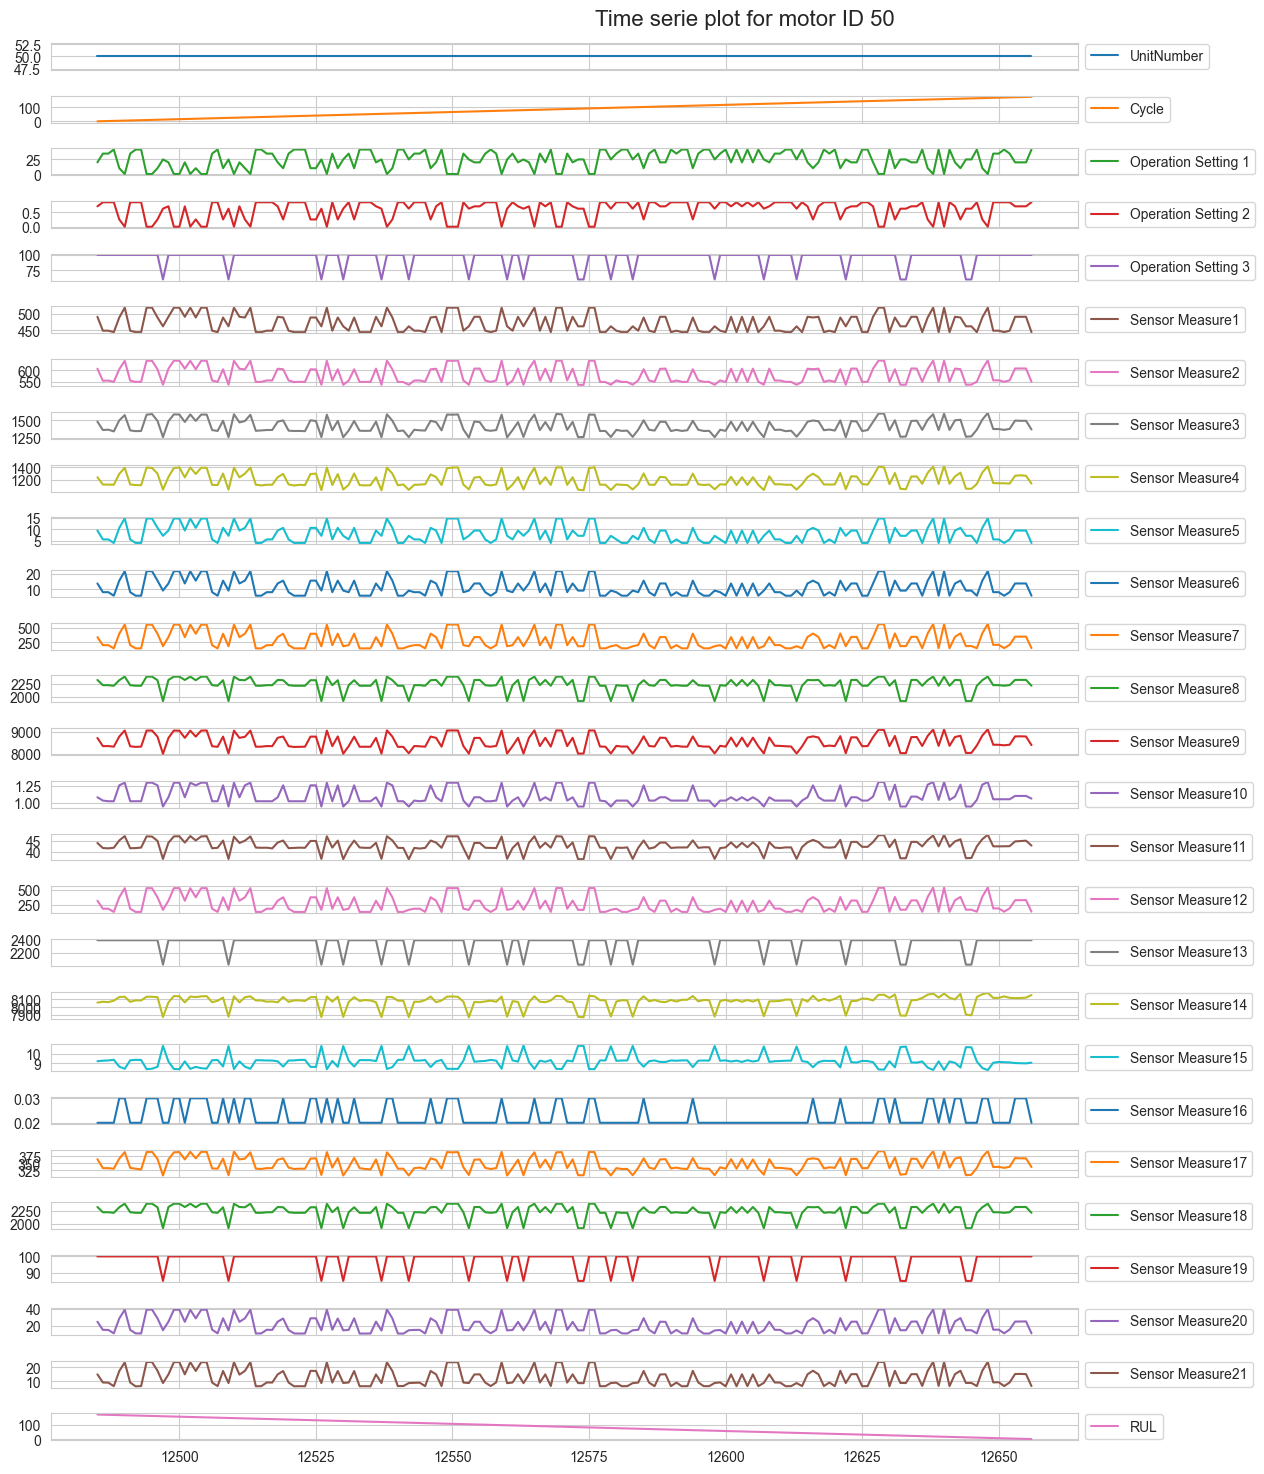

In [108]:
# Plot all sensor data of one motor
motor_id = 50

axes = train_data[train_data['UnitNumber']==motor_id].plot(subplots=True, figsize=(15, 15))
for ax in axes:
    # Set the legend to be outside the plot on the right
    ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.tight_layout(rect=[0, 0, 0.85, 0.97])  # Make room on the right for the legends
plt.suptitle(f'Time serie plot for motor ID {motor_id}', fontsize=16)
plt.show()

It is not easy to see a trend or something here. Lets se more in detail one motor feature.

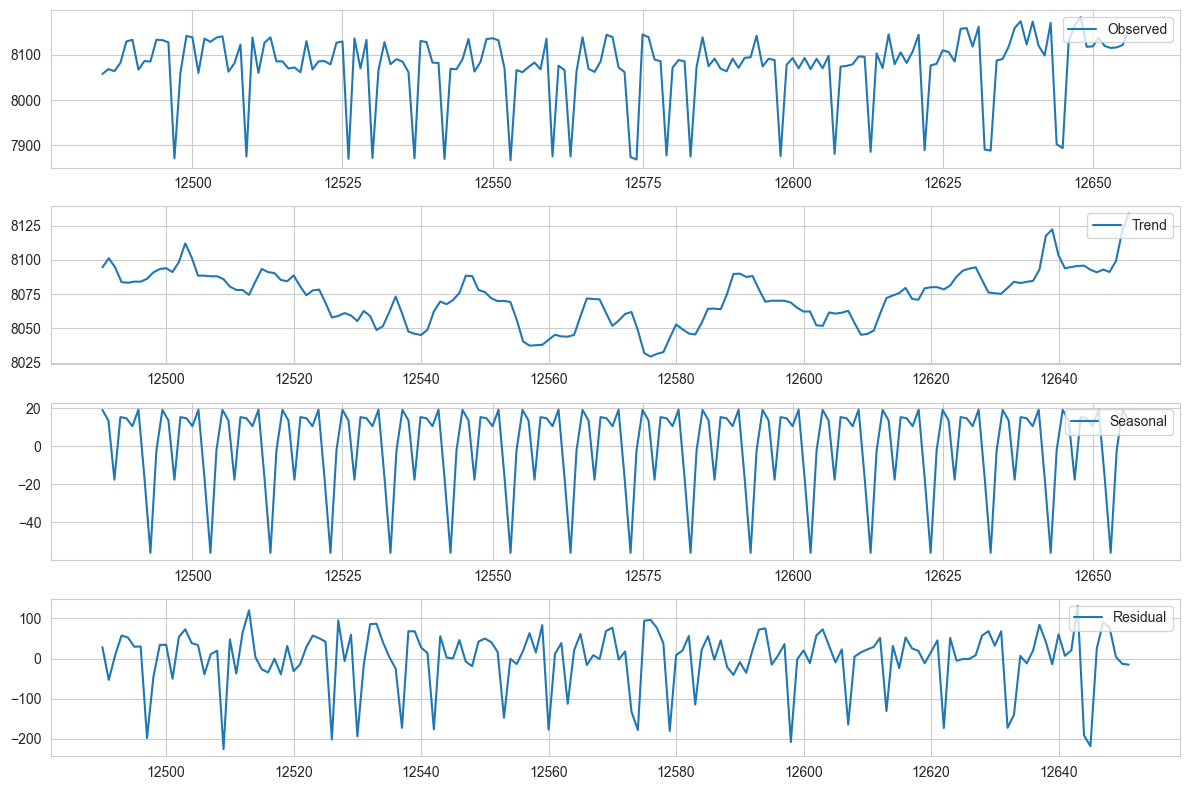

In [152]:
feature = 'Sensor Measure14' #Choose feature to see
motor_id = 50
ts = train_data[train_data['UnitNumber'] == motor_id][feature]

decomposition = sm.tsa.seasonal_decompose(ts, model='additive', period=10)
# Plot the decomposition components
plt.figure(figsize=(12, 8))

plt.subplot(411)
plt.plot(ts, label='Observed')
plt.legend(loc='upper right')

plt.subplot(412)
plt.plot(decomposition.trend, label='Trend')
plt.legend(loc='upper right')

plt.subplot(413)
plt.plot(decomposition.seasonal, label='Seasonal')
plt.legend(loc='upper right')

plt.subplot(414)
plt.plot(decomposition.resid, label='Residual')
plt.legend(loc='upper right')

plt.tight_layout()
plt.show()

Now it is easier to see the trend of each sensor. Lets plot all sensor trends of one motor.

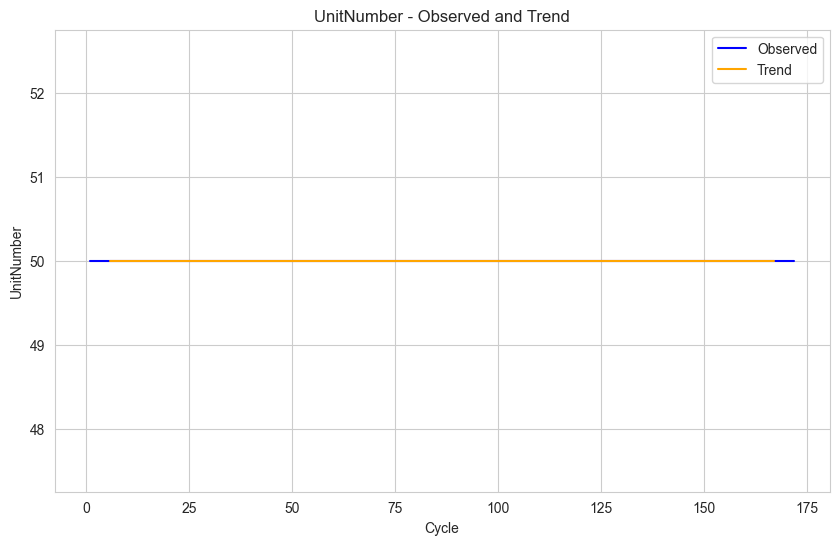

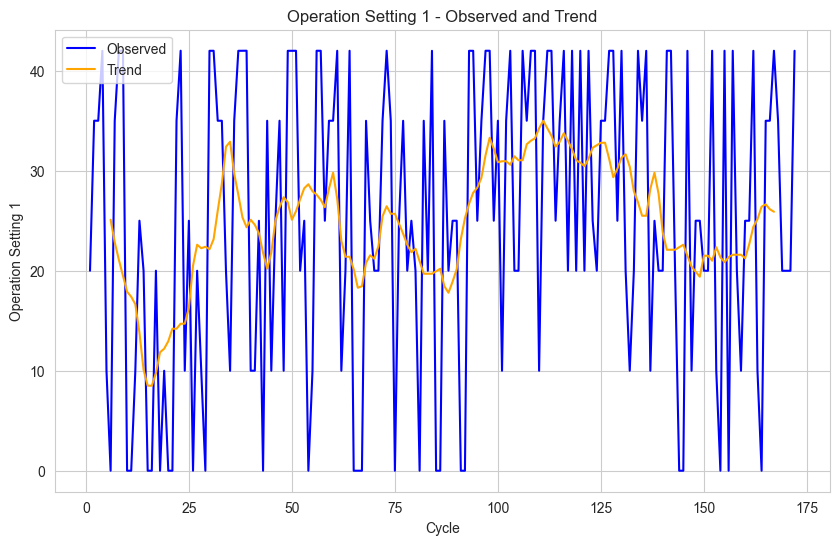

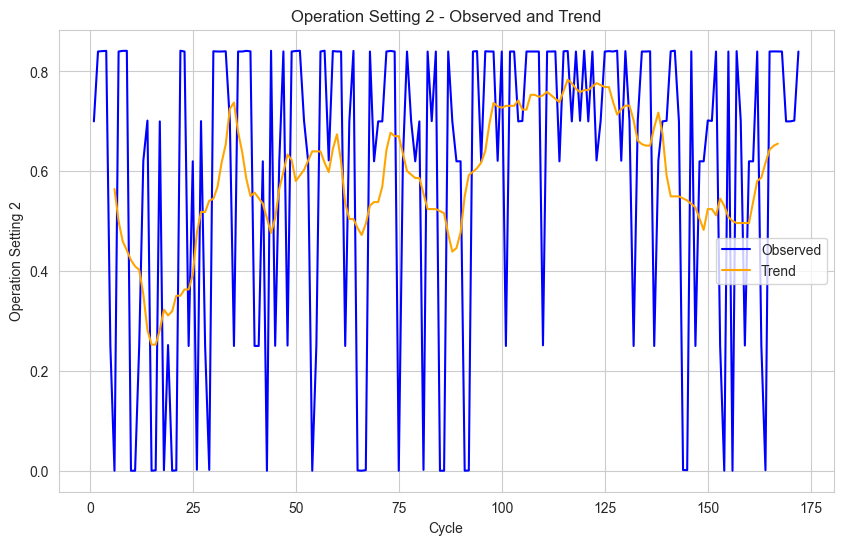

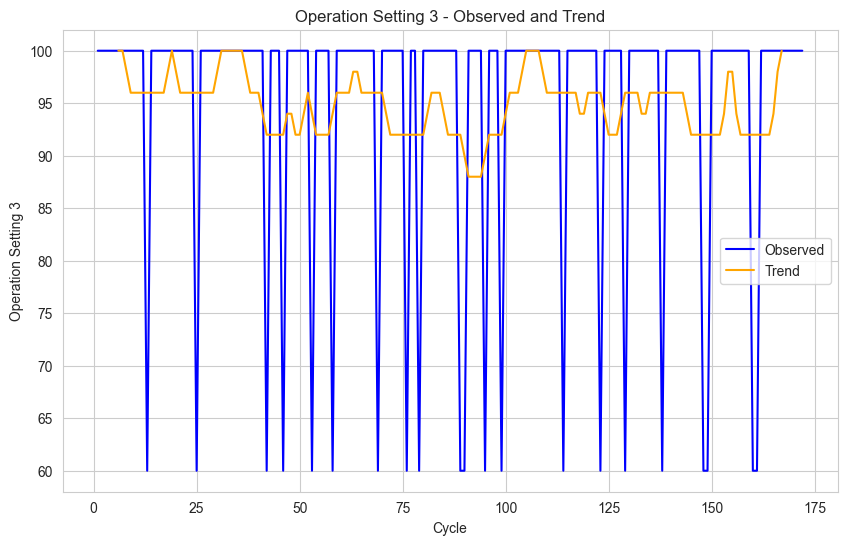

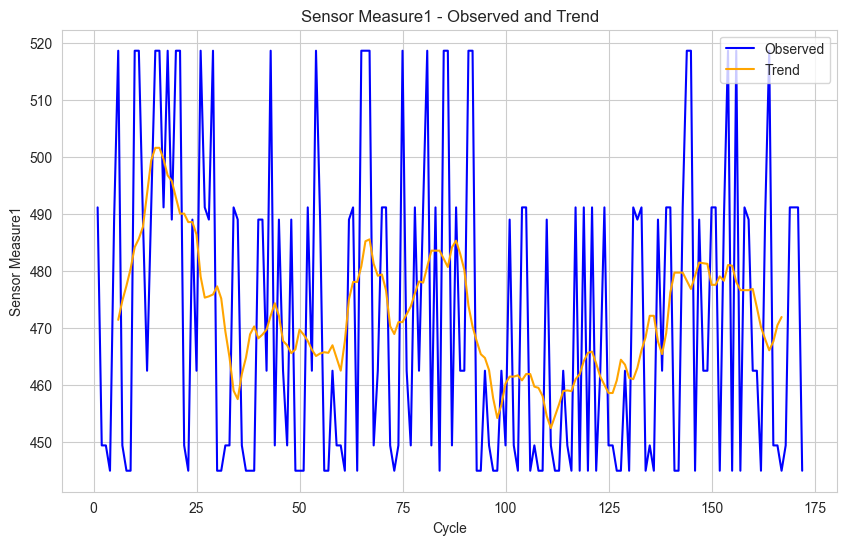

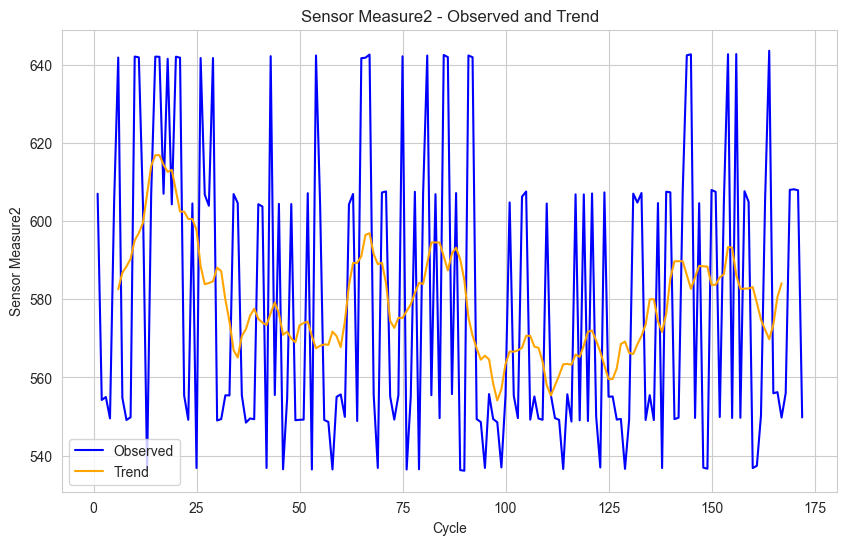

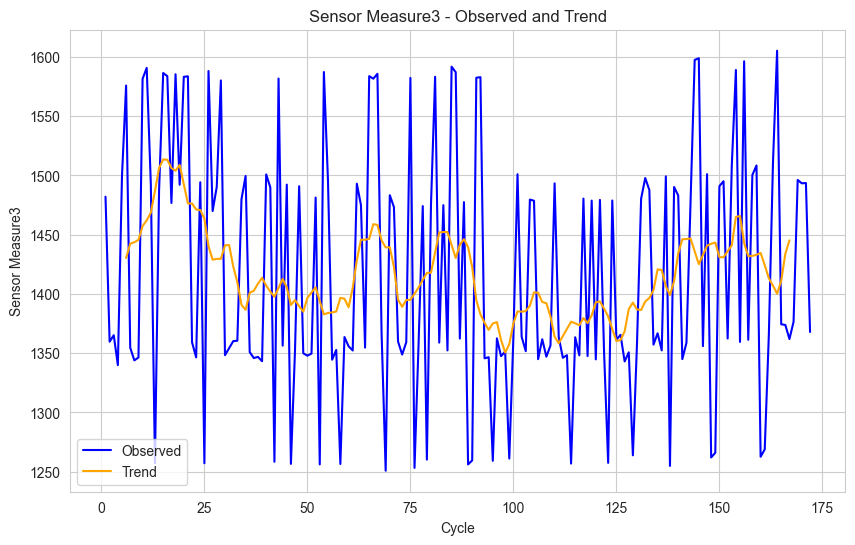

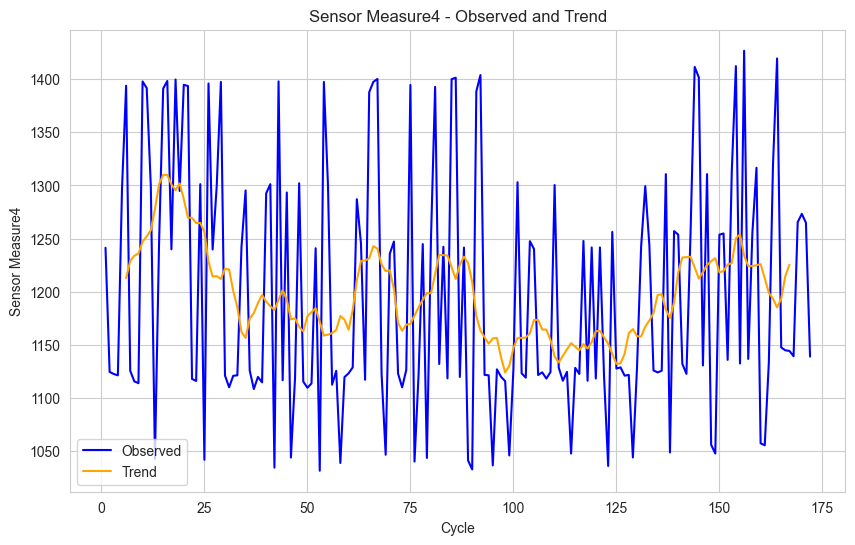

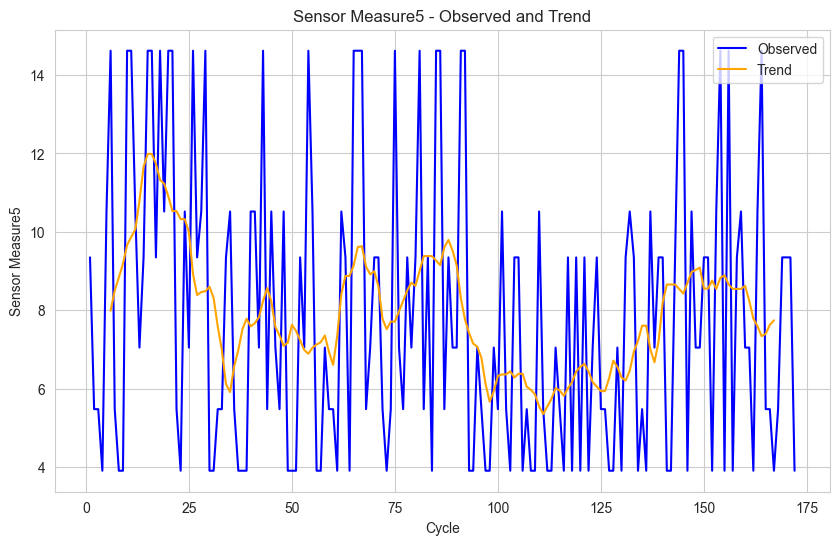

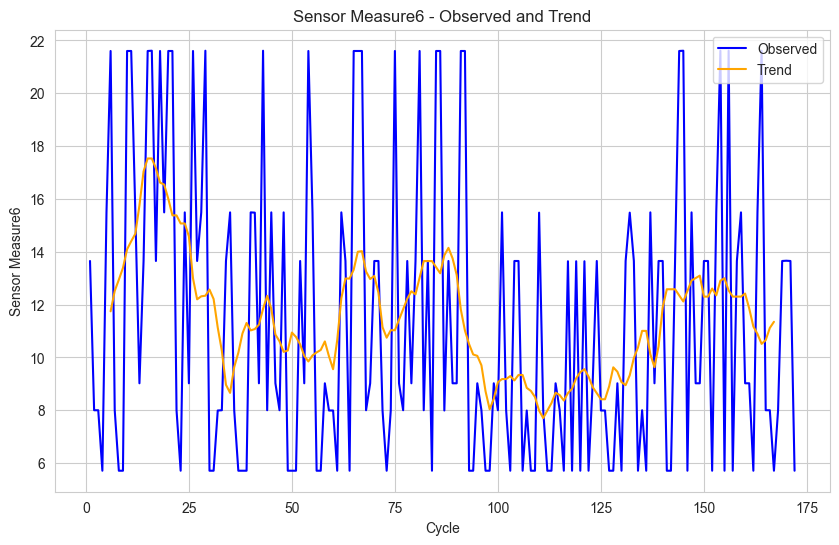

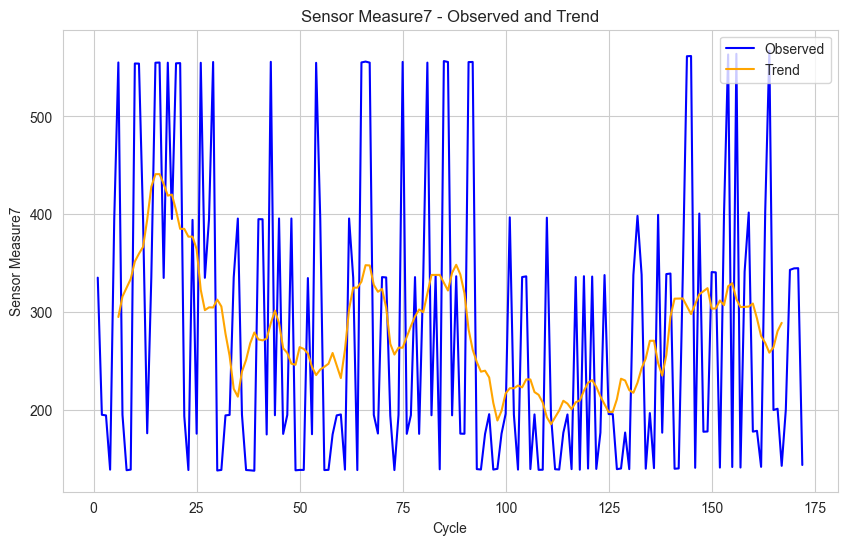

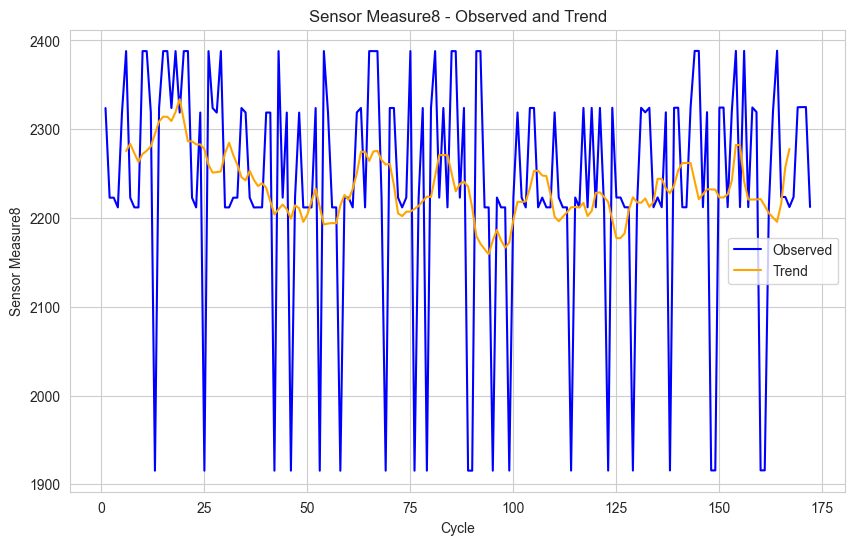

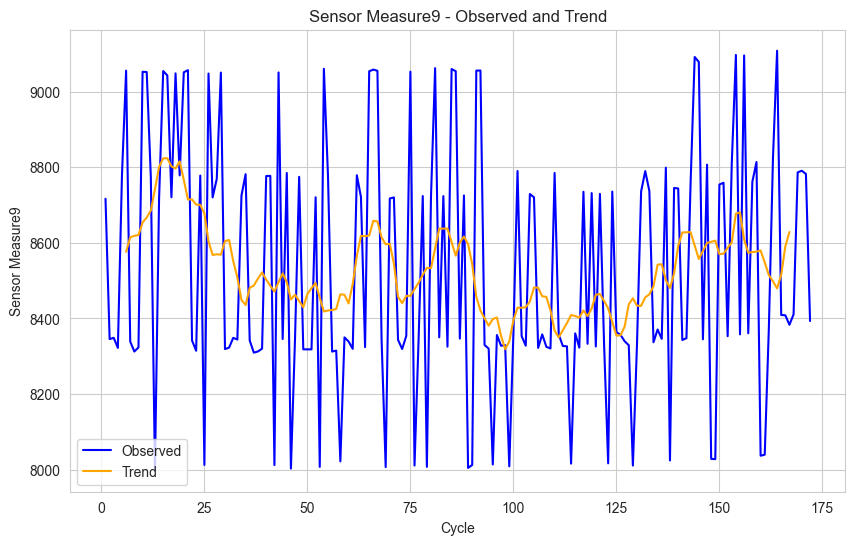

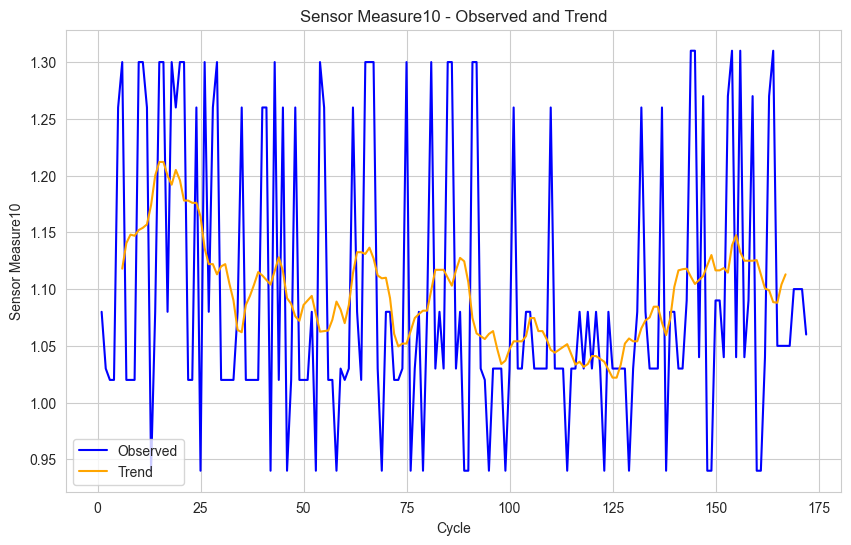

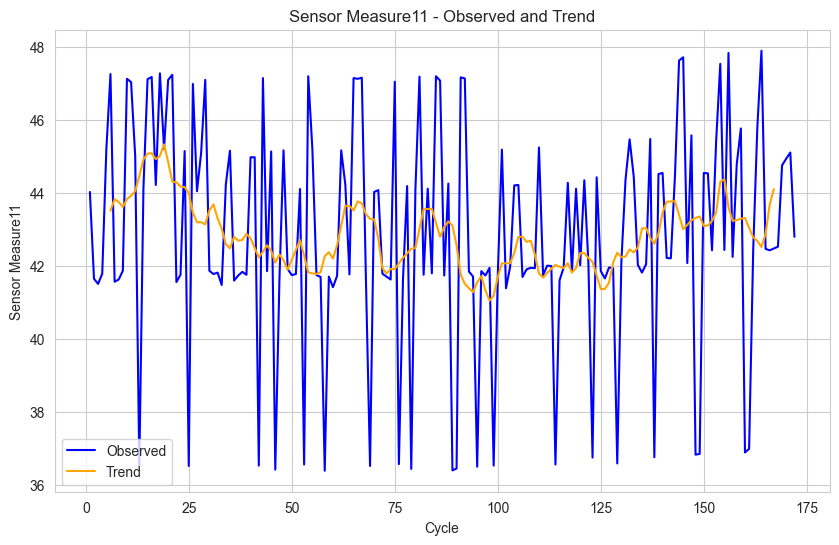

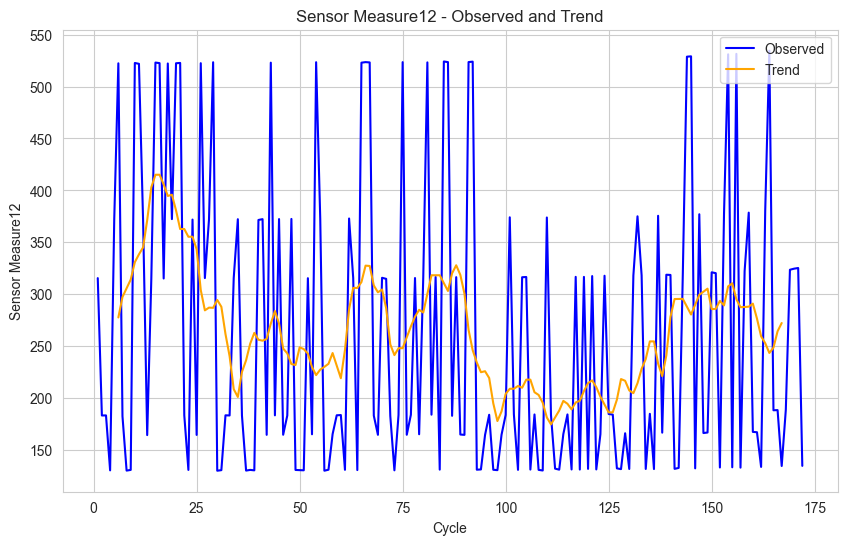

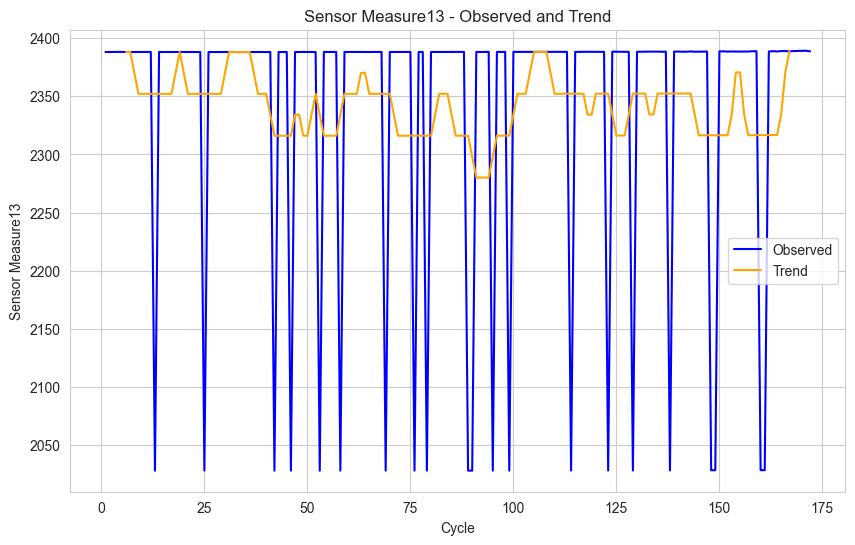

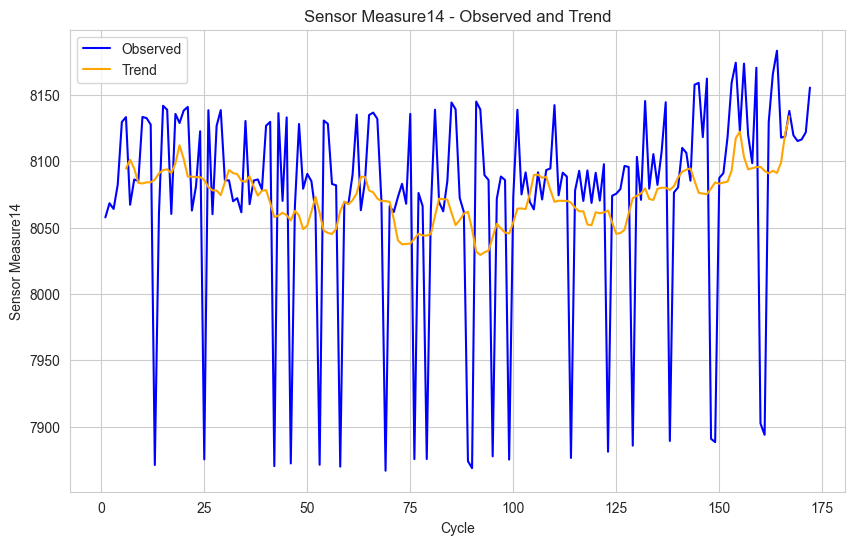

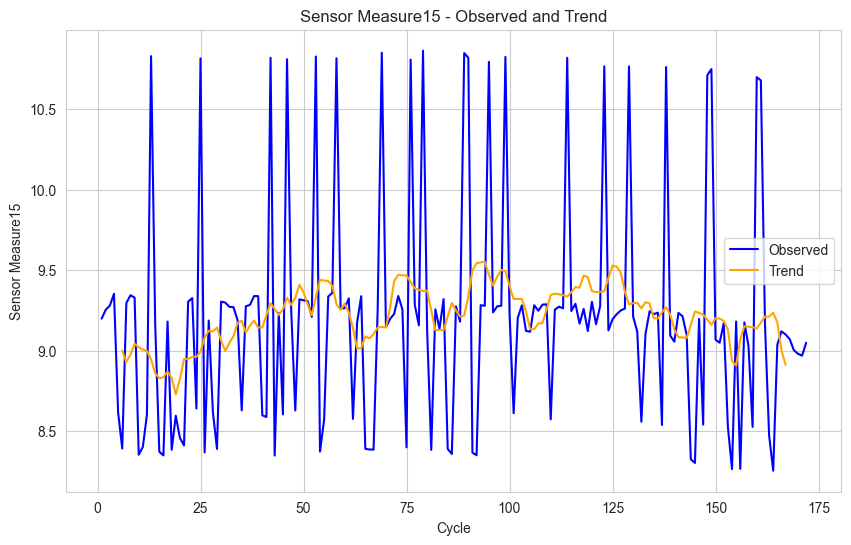

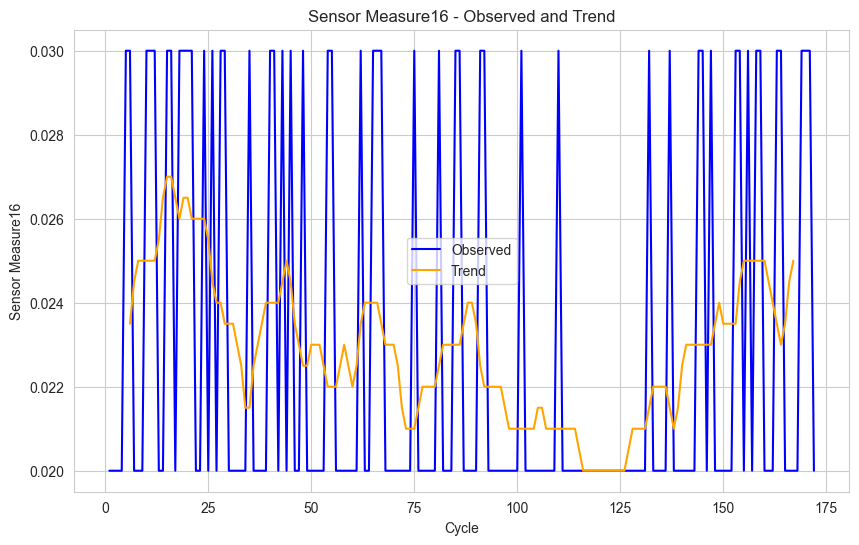

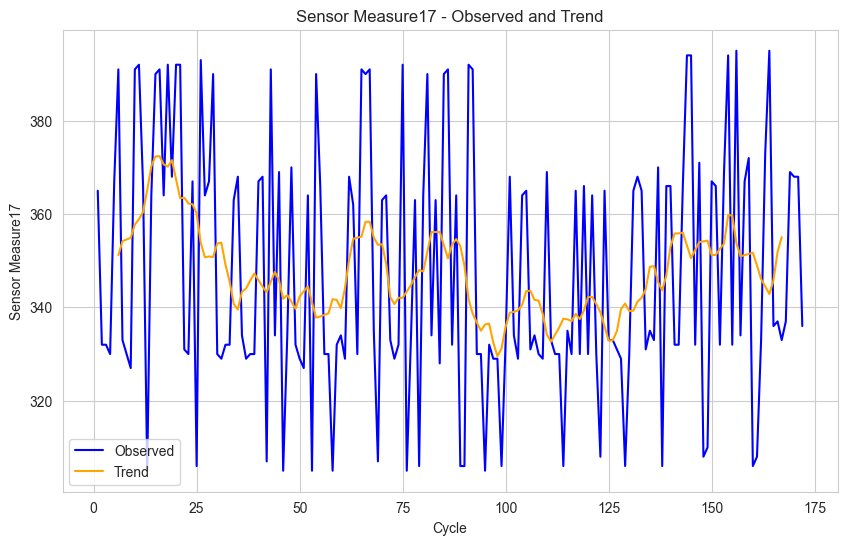

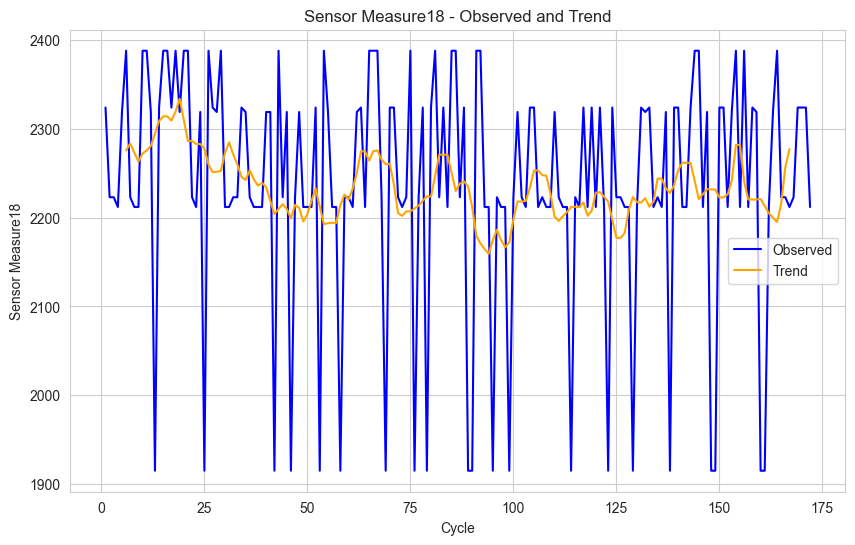

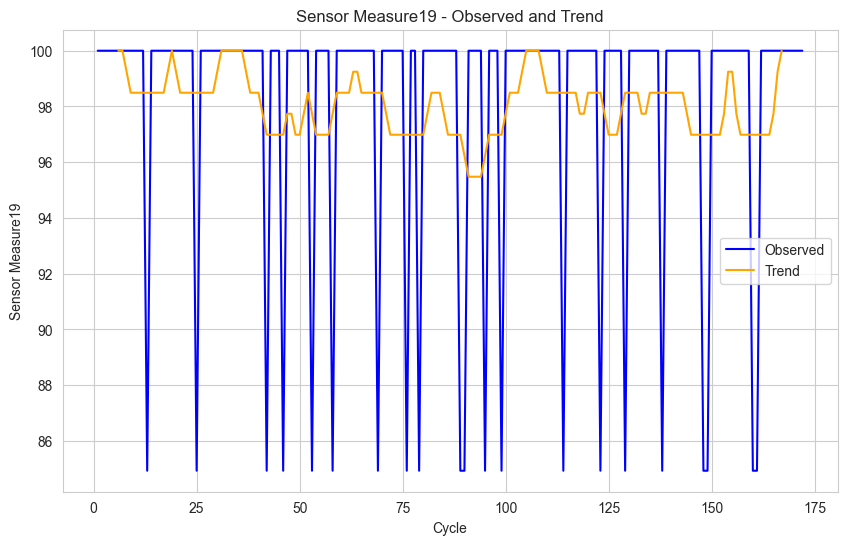

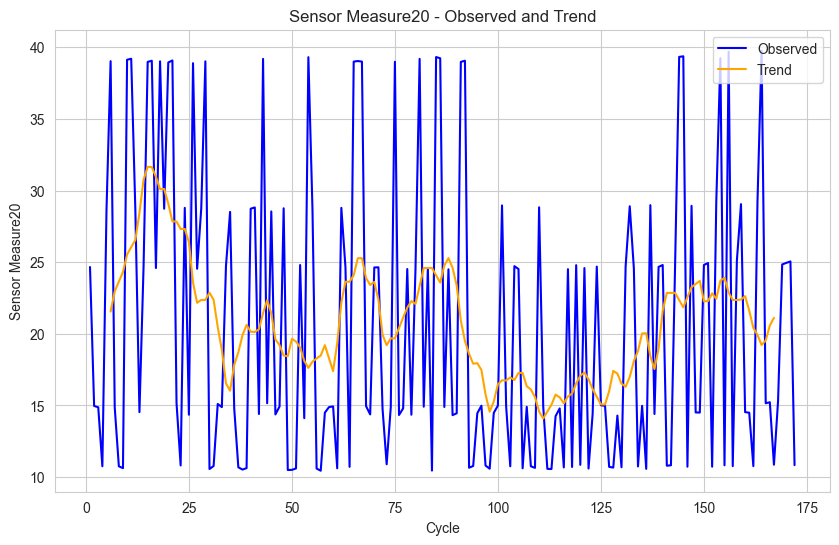

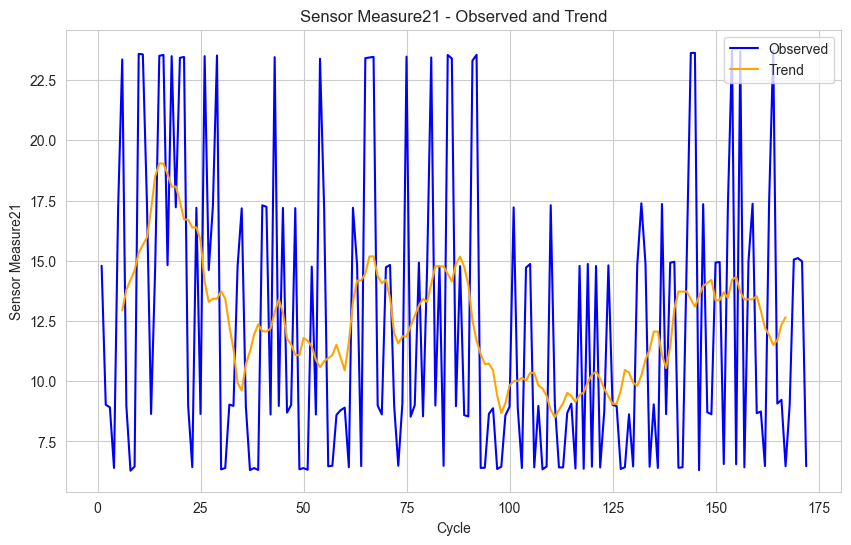

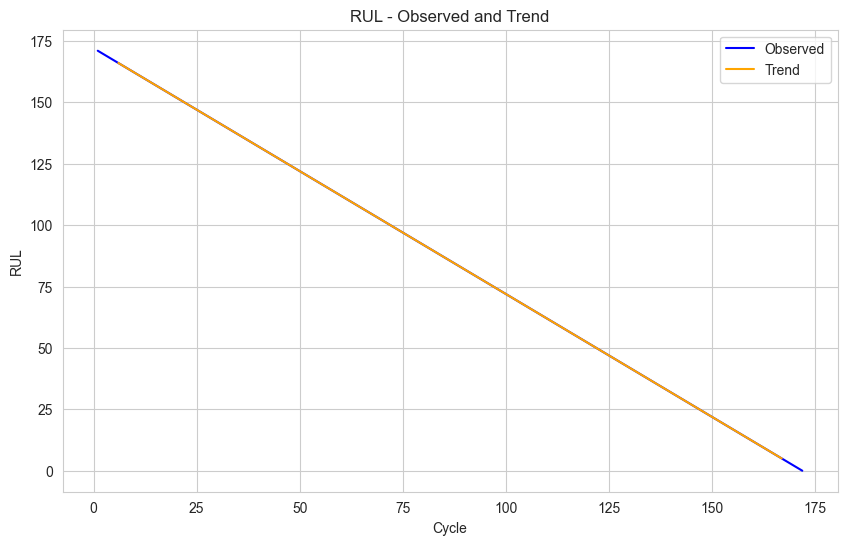

In [156]:
motor_id = 50
unit_data = train_data[train_data['UnitNumber'] == motor_id].set_index('Cycle')
period = 10  # Adjust the period as needed

# Plot observed and trend data for each sensor column
for feature in unit_data.columns:
    ts = unit_data[feature]

    # Perform seasonal decomposition
    decomposition = sm.tsa.seasonal_decompose(ts, model='additive', period=period)

    # Plot the observed and trend components
    plt.figure(figsize=(10, 6))
    plt.plot(ts, label='Observed', color='blue')
    plt.plot(decomposition.trend, label='Trend', color='orange')
    plt.xlabel('Cycle')
    plt.ylabel(feature)
    plt.title(f'{feature} - Observed and Trend')
    plt.legend()
    plt.grid(True)
    plt.show()


It is not easy to say something. But we can see a trend that maybe a model can learn. Lets try to see some motors togeter

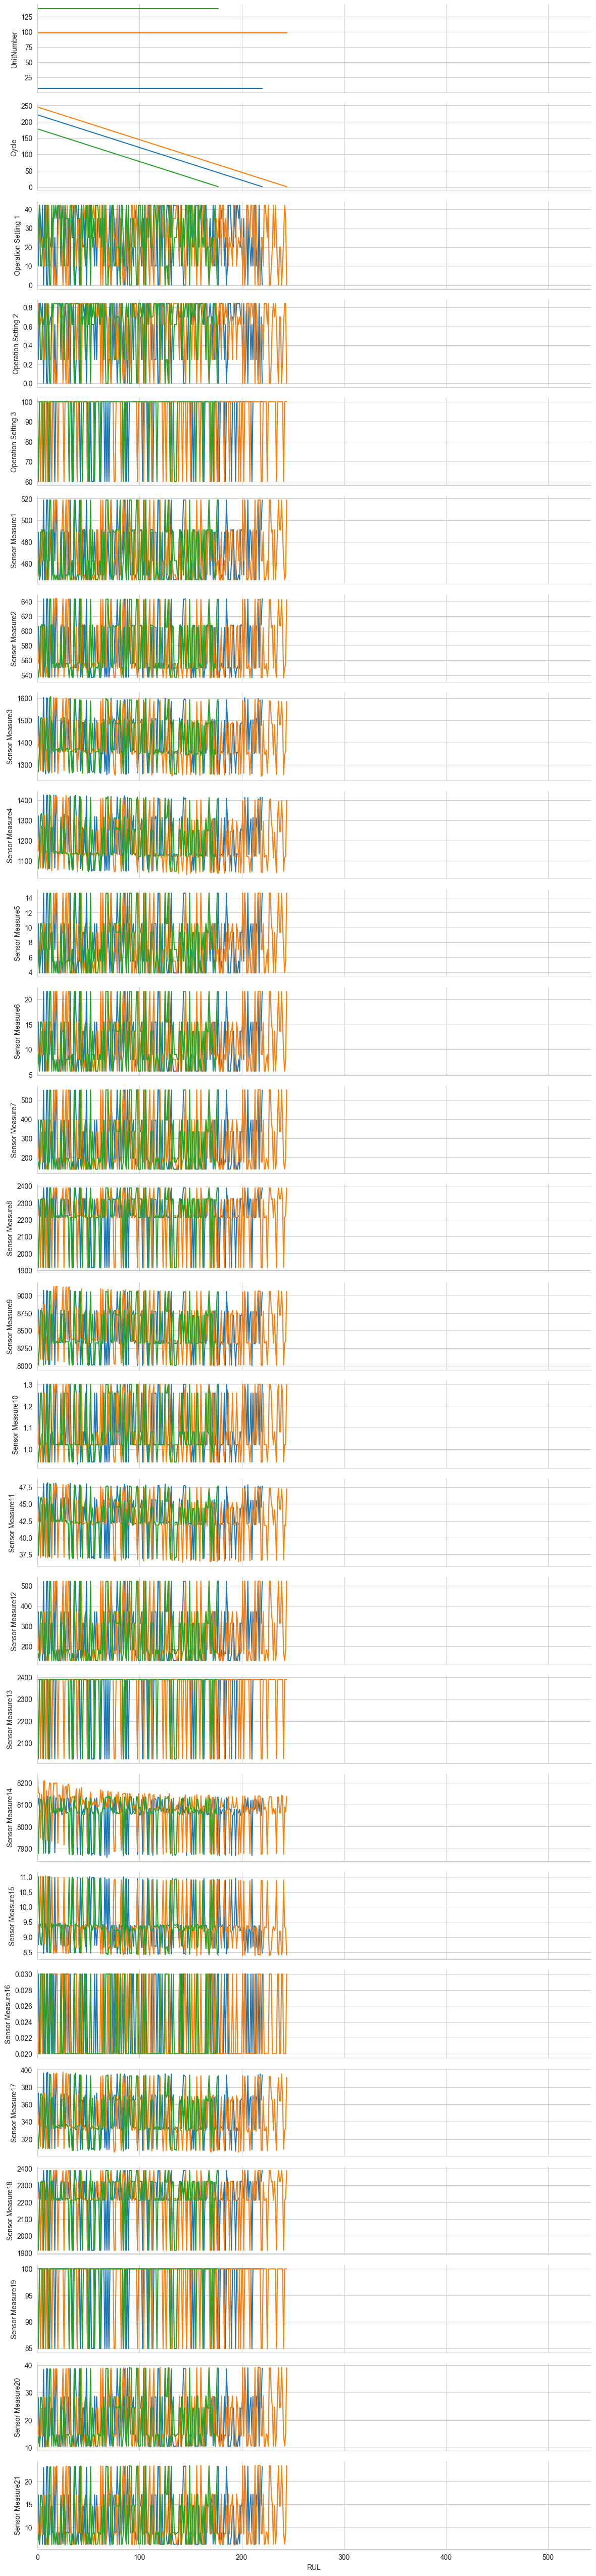

In [153]:
# Plot random 3 motors.
random_motor_ids = pd.Series(unit_train).sample(n=3, random_state=42).tolist()
filtered_data = train_data[train_data['UnitNumber'].isin(random_motor_ids)]
g = sns.PairGrid(data=filtered_data, x_vars='RUL', y_vars=input_file_column_names, hue="UnitNumber", height=2, aspect=6,)
g = g.map(plt.plot)
g = g.set(xlim=(train_data['RUL'].min(), train_data['RUL'].max()))

The tree time lines look very alike. But it is difficult to say something, they overlap a lot.

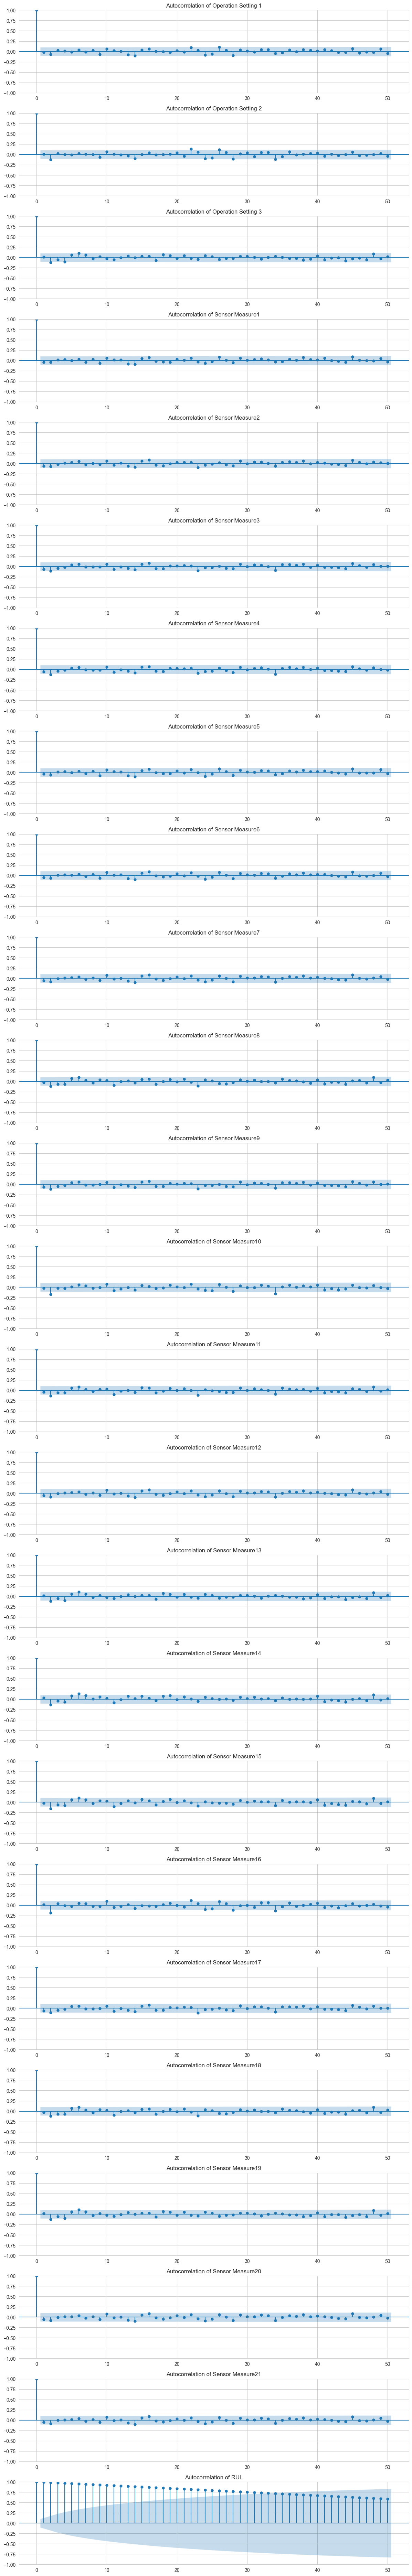

In [163]:
motor_id = 10  # Example unit_id, change as needed
unit_data = train_data[train_data['UnitNumber'] == motor_id].set_index('Cycle')
unit_data = unit_data.drop(['UnitNumber'], axis=1)

# Create subplots for autocorrelation plots
num_data = len(unit_data.columns)
fig, axes = plt.subplots(nrows=num_data, ncols=1, figsize=(12, num_data * 3))

# Compute and plot autocorrelation for each sensor column
for ax, feature in zip(axes, unit_data.columns):
    ts = unit_data[feature]
    
    # Plot the autocorrelation function (ACF)
    sm.graphics.tsa.plot_acf(ts.dropna(), lags=50, ax=ax)
    ax.set_title(f'Autocorrelation of {feature}')

plt.tight_layout()
plt.show()


It is not so good, the autocorrelation is near 0 almost all the time, this tell that the data its pretty random.

## 2 Basic Model